## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [160]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
import folium
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

In [161]:
#loading the data
kc_data = pd.read_csv('data/kc_house_data.csv')
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


DATA PREPROCESSING

In [162]:
#Checking missing values
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(kc_data)
missing_data

,Missing Values,Percentage(%)
yr_renovated,3842,0.18
waterfront,2376,0.11
view,63,0.00


In [163]:
def filling_missing_values(data, columns):
    missing = missing_values(data) # store the output of missing_values function
    for col in columns:
        if col in missing.index: # check if column has missing values
            data[col] = data[col].fillna(data[col].mode()[0]) # fill missing values with mode
    return data
filling_missing_values(kc_data, ['waterfront','yr_renovated','view'])

kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [164]:
#checking for duplicates

def check_duplicates(data):
    """
    A simple function to check for duplicates in a given dataset.
    """
    duplicates = data.duplicated().sum()
    return duplicates
check_duplicates(kc_data)

0

In [175]:
#checking for inconsistencies in the data
def print_value_counts(df):
    for column in df.columns:
        # Print the column name
        print("Value counts for {} column:".format(column))
        # Print the value counts for the column
        print(df[column].value_counts())
        # Add a separator for clarity
        print("="*30)

print_value_counts(kc_data)

Value counts for id column:
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
Value counts for date column:
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
2/15/2015      1
5/24/2015      1
5/15/2015      1
3/8/2015       1
8/30/2014      1
Name: date, Length: 372, dtype: int64
Value counts for price column:
350000.00    172
450000.00    172
550000.00    159
500000.00    152
425000.00    150
            ... 
870515.00      1
336950.00      1
386100.00      1
176250.00      1
884744.00      1
Name: price, Length: 3622, dtype: int64
Value counts for bedrooms column:
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
Value counts for bathrooms column:
2.50    5377
1.

In [173]:
#Checking duplicated id column

duplicates_id = kc_data[kc_data.duplicated(subset=['id'], keep=False)]
duplicates_id



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.00,3,1.50,1580,5000,1.00,NO,NONE,...,8 Good,1290,290.0,1939,0.00,98117,47.69,-122.39,1570,4500
94,6021501535,12/23/2014,700000.00,3,1.50,1580,5000,1.00,NO,NONE,...,8 Good,1290,290.0,1939,0.00,98117,47.69,-122.39,1570,4500
313,4139480200,6/18/2014,1380000.00,4,3.25,4290,12103,1.00,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.00,98006,47.55,-122.10,3860,11244
314,4139480200,12/9/2014,1400000.00,4,3.25,4290,12103,1.00,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.00,98006,47.55,-122.10,3860,11244
324,7520000520,9/5/2014,232000.00,2,1.00,1240,12092,1.00,NO,NONE,...,6 Low Average,960,280.0,1922,1984.00,98146,47.50,-122.35,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.00,4,2.50,2680,5539,2.00,NO,NONE,...,8 Good,2680,0.0,2013,0.00,98045,47.48,-121.73,2680,5992
20763,6300000226,6/26/2014,240000.00,4,1.00,1200,2171,1.50,NO,NONE,...,7 Average,1200,0.0,1933,0.00,98133,47.71,-122.34,1130,1598
20764,6300000226,5/4/2015,380000.00,4,1.00,1200,2171,1.50,NO,NONE,...,7 Average,1200,0.0,1933,0.00,98133,47.71,-122.34,1130,1598
21564,7853420110,10/3/2014,594866.00,3,3.00,2780,6000,2.00,NO,NONE,...,9 Better,2780,0.0,2013,0.00,98065,47.52,-121.89,2850,6000


In [174]:
#checking for outliers in the dataset

def check_outliers(data, columns):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15,5))
    for i, column in enumerate(columns):
        # Use interquartile range (IQR) to find outliers for the specified column
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        print("IQR for {} column: {}".format(column, iqr))

        # Determine the outliers based on the IQR
        outliers = (data[column] < q1 - 1.5 * iqr) | (data[column] > q3 + 1.5 * iqr)
        print("Number of outliers in {} column: {}".format(column, outliers.sum()))

        # Create a box plot to visualize the distribution of the specified column
        sns.boxplot(data=data, x=column, ax=axes[i])
    plt.show()

IQR for price column: 323000.0
Number of outliers in price column: 1158
IQR for sqft_lot column: 5645.0
Number of outliers in sqft_lot column: 2419
IQR for sqft_above column: 1020.0
Number of outliers in sqft_above column: 610
IQR for sqft_lot column: 5645.0
Number of outliers in sqft_lot column: 2419
IQR for sqft_living15 column: 870.0
Number of outliers in sqft_living15 column: 543
IQR for sqft_lot15 column: 4983.0
Number of outliers in sqft_lot15 column: 2188


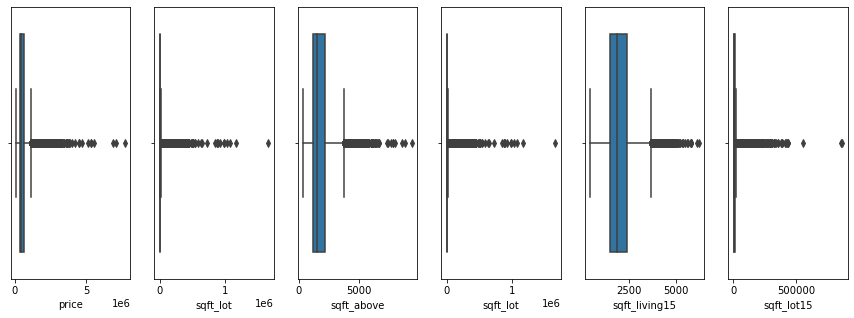

In [167]:
check_outliers(kc_data, ['price', 'sqft_lot', 'sqft_above','sqft_lot','sqft_living15','sqft_lot15'])

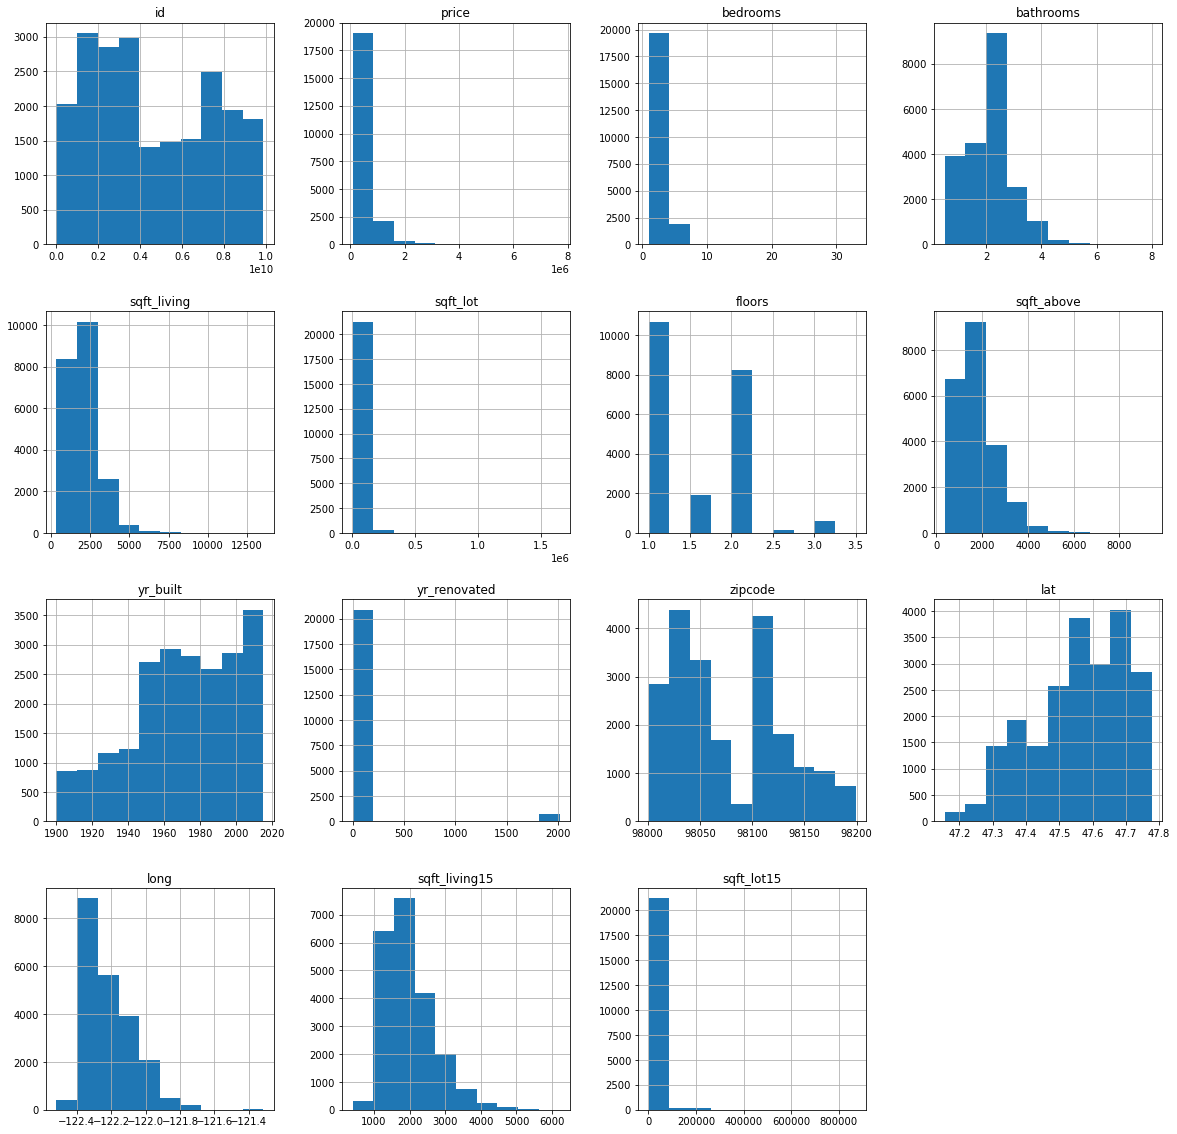

In [168]:
kc_data.hist(figsize=(20,20));

Bivariete EDA

To show relationship between variables

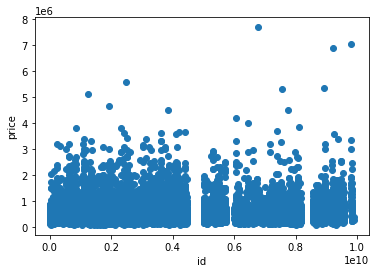

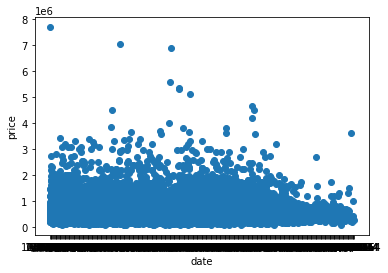

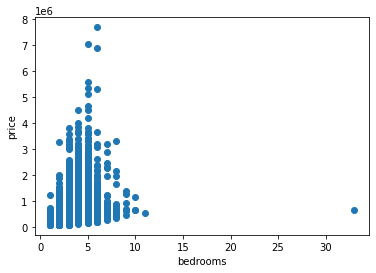

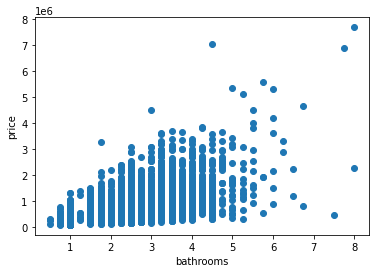

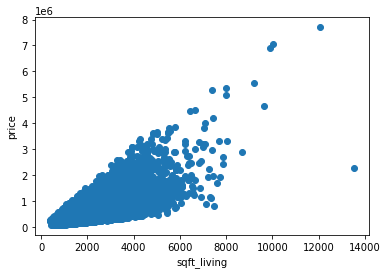

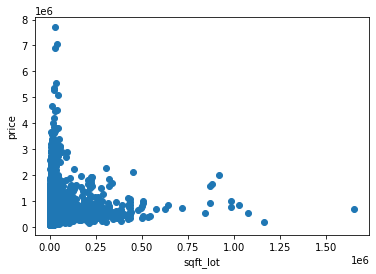

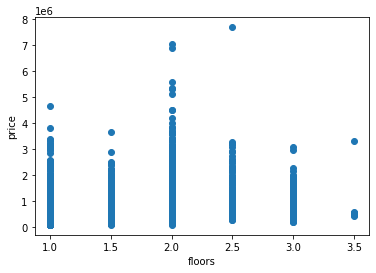

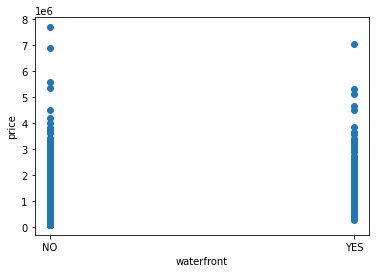

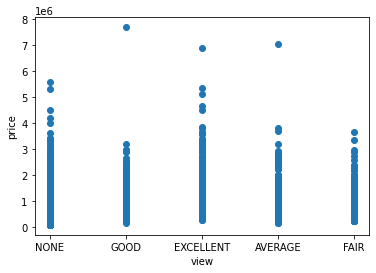

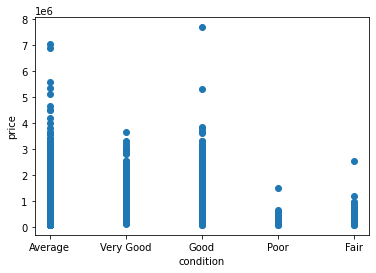

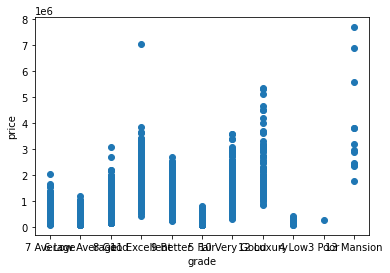

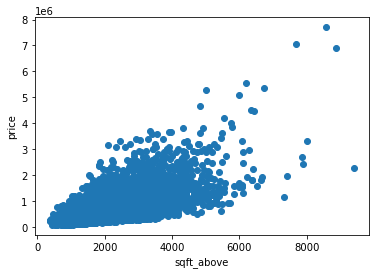

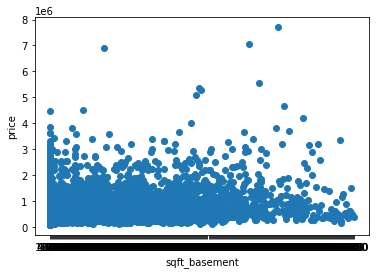

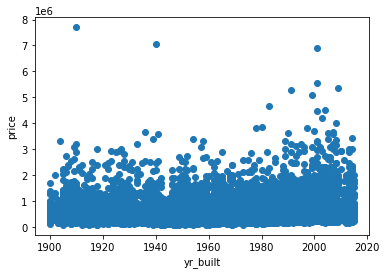

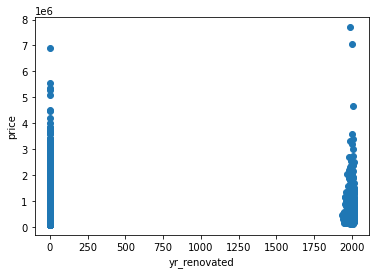

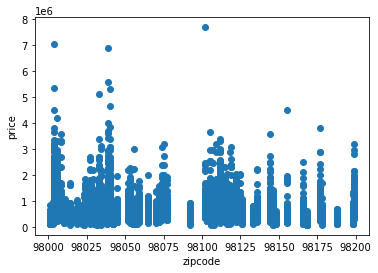

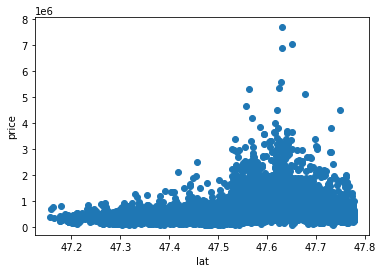

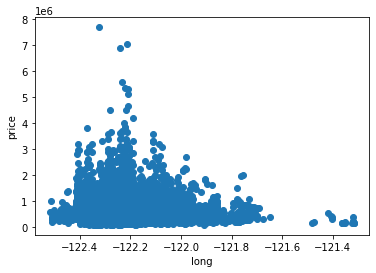

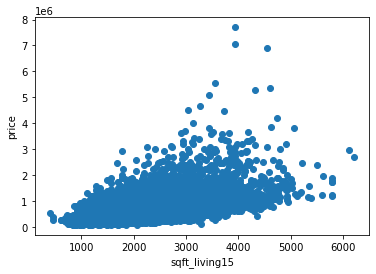

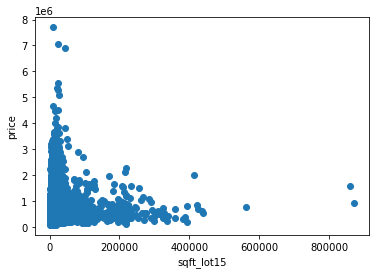

In [169]:
specific_col = 'price'
for col in kc_data.columns:
    if col != specific_col:
        plt.scatter(kc_data[col], kc_data[specific_col])
        plt.xlabel(col)
        plt.ylabel(specific_col)
        plt.show()

Multivariete EDA

To show features  with most linear relationship with price

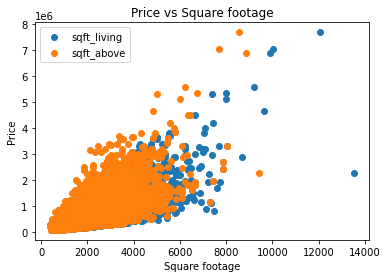

In [170]:
plt.scatter(kc_data['sqft_living'], kc_data['price'], label='sqft_living')
plt.scatter(kc_data['sqft_above'], kc_data['price'], label='sqft_above')
plt.xlabel('Square footage')
plt.ylabel('Price')
plt.title('Price vs Square footage')
plt.legend()
plt.show()

In [171]:
kc_quarter =kc_data.copy()

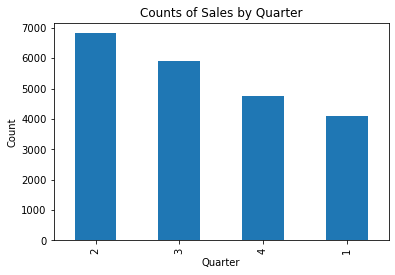

In [172]:
def plot_quarter_counts(data):
    dates = pd.to_datetime(data['date'], format='%m/%d/%Y')
    dates_column = dates.dt.quarter
    # get the counts for each quarter
    quarter_counts = dates_column.value_counts()
    quarter_counts.plot.bar()
    # plot a bar chart of the quarter counts
    plt.title('Counts of Sales by Quarter')
    plt.xlabel('Quarter')
    plt.ylabel('Count')
    plt.show()

plot_quarter_counts(kc_quarter)